In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlip.pylot as plt
%matplotlib inline

ModuleNotFoundError: No module named 'matplotlip'

In [6]:
df = pd.read_csv("./Mall_Customers.csv")
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [7]:
df.rename(columns={"Annual Income (k$)": "Income", "Spending Score (1-100)": "Spending Score"}, inplace=True)
df.head()

,CustomerID,Gender,Age,Income,Spending Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


# Check Descriptive Statistics

In [8]:
df.describe()

,CustomerID,Age,Income,Spending Score
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


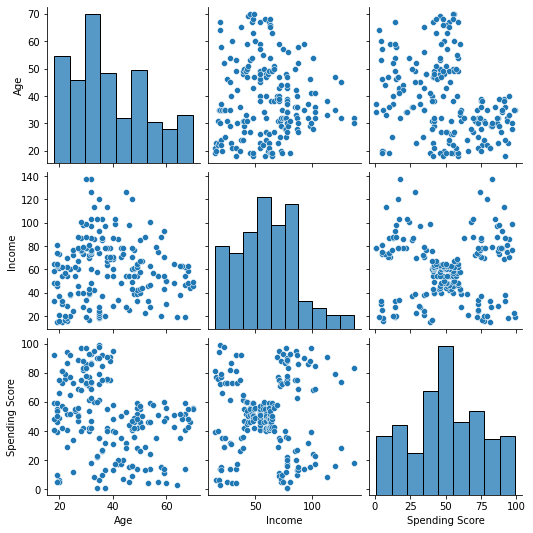

In [9]:
sns.pairplot(df[["Age", "Income", "Spending Score"]])

In [12]:
import sklearn.cluster as cluster

In [18]:
kmeans = cluster.KMeans(n_clusters=5, init='k-means++') #init changes algorithm
kmeans = kmeans.fit(df[["Spending Score", "Income"]]) 

In [19]:
kmeans.cluster_centers_

array([[20.91304348, 26.30434783],
       [82.12820513, 86.53846154],
       [49.51851852, 55.2962963 ],
       [17.11428571, 88.2       ],
       [79.36363636, 25.72727273]])

# Attach Clusters to Og Data

In [20]:
df["Clusters"] = kmeans.labels_

In [21]:
df.head()

,CustomerID,Gender,Age,Income,Spending Score,Clusters
0,1,Male,19,15,39,0
1,2,Male,21,15,81,4
2,3,Female,20,16,6,0
3,4,Female,23,16,77,4
4,5,Female,31,17,40,0


In [23]:
df["Clusters"].value_counts()

2    81
1    39
3    35
0    23
4    22
Name: Clusters, dtype: int64

# Export Data

In [24]:
df.to_csv("Mall_Customers_5Means.csv", index=False)

# Plot Cluster on Chart

<AxesSubplot:xlabel='Spending Score', ylabel='Income'>

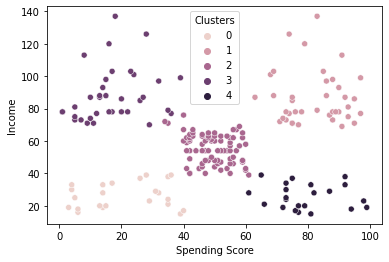

In [26]:
sns.scatterplot(x="Spending Score", y="Income", hue="Clusters", data=df)